## Imports

In [17]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [18]:
connection = sqlite3.connect('../data/checking-logs.sqlite.sqlite')
connection

## analyze only the users and not the admins

In [19]:
request = '''
SELECT timestamp
FROM checker
WHERE uid LIKE 'user_%'
'''
commits = pd.io.sql.read_sql(request, connection, parse_dates=['timestamp'])
commits

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


## create two lists of values (for working days and for weekends) for the histogram input

In [20]:
commits['date'] = commits['timestamp'].dt.floor('d')
commits['hour'] = commits['timestamp'].dt.hour
commits = commits.drop('timestamp', axis=1)

In [21]:
working_day = commits.loc[commits['date'].dt.dayofweek < 5]['hour']
weekend = commits.loc[commits['date'].dt.dayofweek >= 5]['hour']
working_day = working_day.reset_index(drop=True)
weekend = weekend.reset_index(drop=True)
working_day

0        5
1        5
2        5
3        5
4        5
        ..
2032    20
2033    20
2034    20
2035    20
2036    20
Name: hour, Length: 2037, dtype: int64

In [22]:
weekend

0        7
1       13
2       13
3       13
4       13
        ..
1165    22
1166    22
1167    22
1168    22
1169    22
Name: hour, Length: 1170, dtype: int64

## the figsize is still the same, you can choose the fontsize as well as the color palette
## use a level of transparency for the histogram in front equal to 0.7

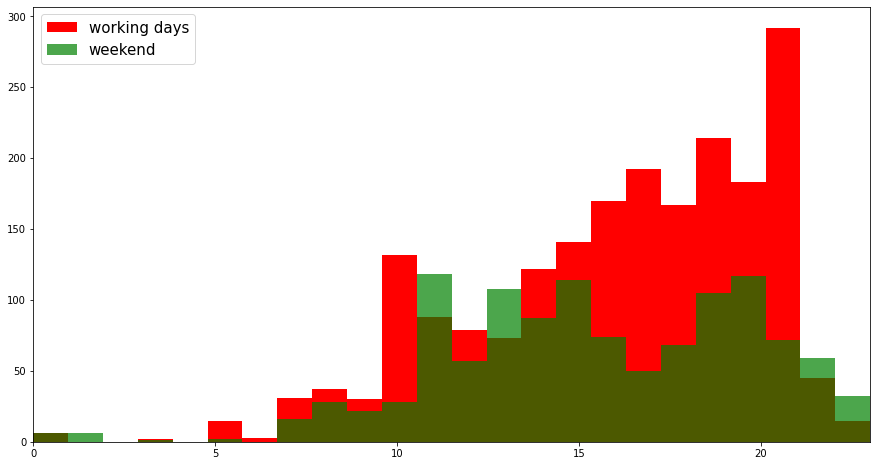

In [34]:
fig, axes = plt.subplots(figsize=(15,8))
axes.hist(working_day, bins=24, label='working days', color='red')
axes.hist(weekend, bins=24, label='weekend', color='green', alpha=0.7)
axes.set_xlim(0, 23)
axes.legend(loc='upper left', fontsize=15)
plt.show()

## “Are there hours when the total number of commits was higher on weekends than on working days?” In your answer, put the top-4 examples.

In [42]:
df1 = working_day.value_counts()
df1 = df1.sort_index()
df1 = df1.rename('working_day')
df1 = df1.to_frame()
df1

,working_day
0,6
3,2
5,15
6,3
7,31
8,37
9,30
10,132
11,88
12,79


In [43]:
df2 = weekend.value_counts()
df2 = df2.sort_index()
df2 = df2.rename('weekend')
df2 = df2.to_frame()
df2

,weekend
0,6
1,6
3,1
5,2
7,16
8,28
9,22
10,28
11,118
12,57


In [45]:
df = df1.join(df2, how='inner')
df = df.rename_axis('hour')
df

,working_day,weekend
hour,,
0,6,6
3,2,1
5,15,2
7,31,16
8,37,28
9,30,22
10,132,28
11,88,118
12,79,57


In [46]:
df.loc[df['working_day'] < df['weekend']]

,working_day,weekend
hour,,
11,88,118
13,73,108
22,45,59
23,15,32


#### 11, 13, 22, 23 - hours when the total number of commits was higher on weekends than on working days

In [47]:
connection.close()